In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

# Diabetes attributes
- import Dataset 
- visaul data and abserve strucure 
- Train a classifier

# diabetes dataset

In [3]:
data_func = pd.read_csv('diabetes.csv')
Positives=data_func[data_func['Outcome']==1]
Negatives=data_func[data_func['Outcome']==0]

# Attributes

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

In [4]:
data_func.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [5]:
data_func.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Pregnancies                 2000 non-null int64
Glucose                     2000 non-null int64
BloodPressure               2000 non-null int64
SkinThickness               2000 non-null int64
Insulin                     2000 non-null int64
BMI                         2000 non-null float64
DiabetesPedigreeFunction    2000 non-null float64
Age                         2000 non-null int64
Outcome                     2000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 140.7 KB


In [6]:
data_func.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [7]:
data_func.shape

(2000, 9)

In [8]:
data_func.groupby("Outcome").size()

Outcome
0    1316
1     684
dtype: int64

# while outcome =1 which is positive 

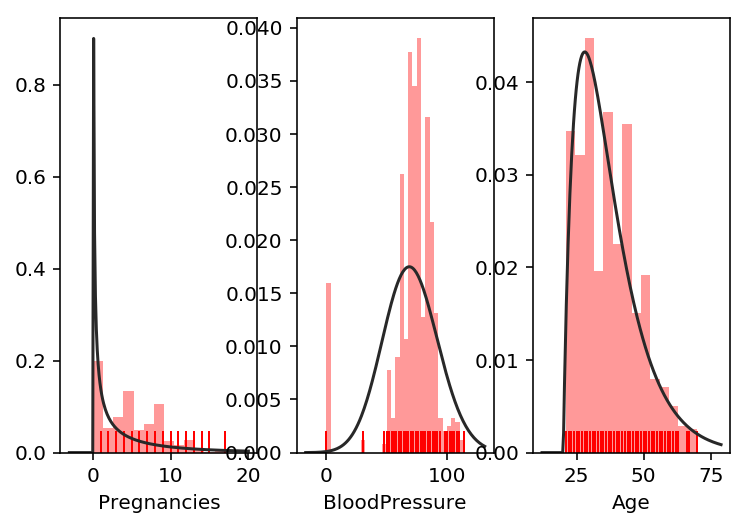

In [9]:
fig, ax =plt.subplots(1,3)
sns.distplot(Positives['Pregnancies'],rug=True,kde=False,color='r',fit=stats.gamma,ax=ax[0])
sns.distplot(Positives['BloodPressure'],rug=True,kde=False,color='r',fit=stats.gamma,ax=ax[1])
sns.distplot(Positives['Age'],rug=True,kde=False,color='r',fit=stats.gamma,ax=ax[2])
fig.show()

# While outcome =0 which is negative

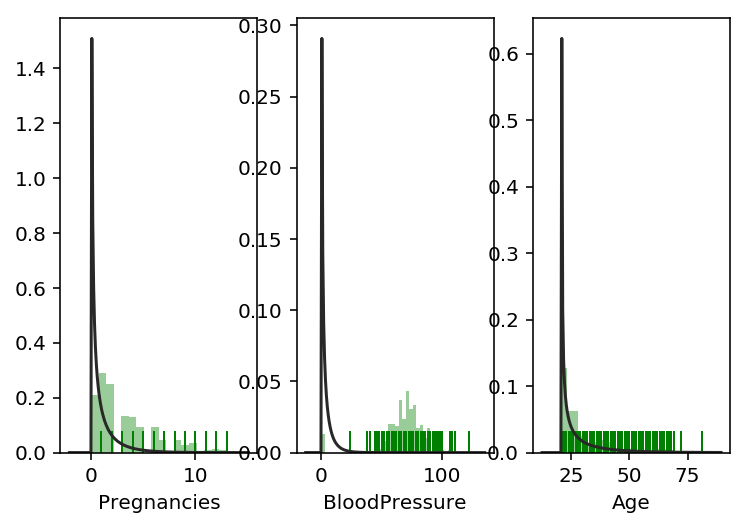

In [10]:
fig, ax =plt.subplots(1,3)
sns.distplot(Negatives['Pregnancies'],rug=True,kde=False,color='g',fit=stats.gamma,ax=ax[0])
sns.distplot(Negatives['BloodPressure'],rug=True,kde=False,color='g',fit=stats.gamma,ax=ax[1])
sns.distplot(Negatives['Age'],rug=True,kde=False,color='g',fit=stats.gamma,ax=ax[2])
fig.show()

# visualize data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024AB19B6F60>,
      dtype=object)

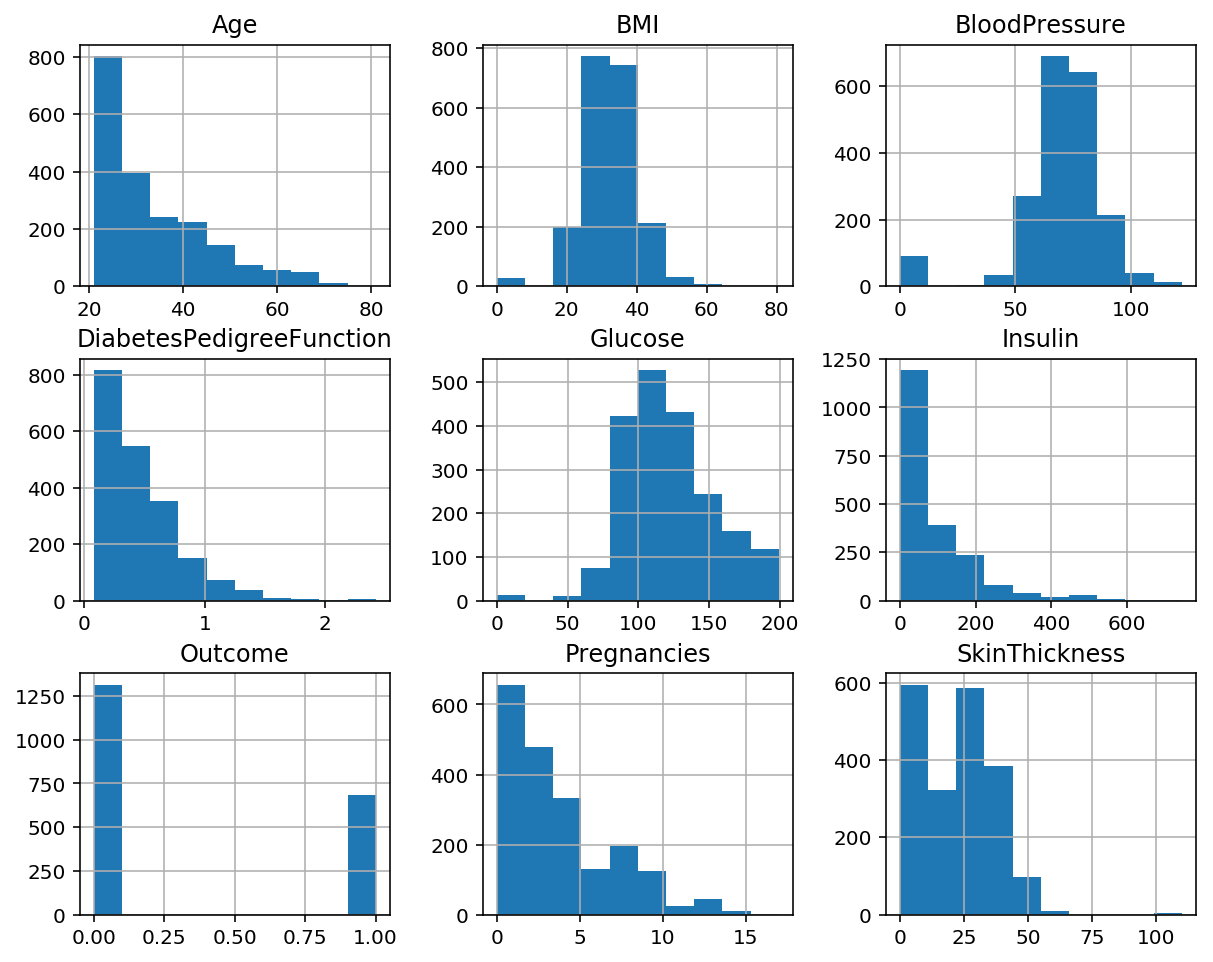

In [11]:
data_func.hist(figsize=(10,8))

# finding correlation between attributes

In [12]:
data_func.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


# print heatmap

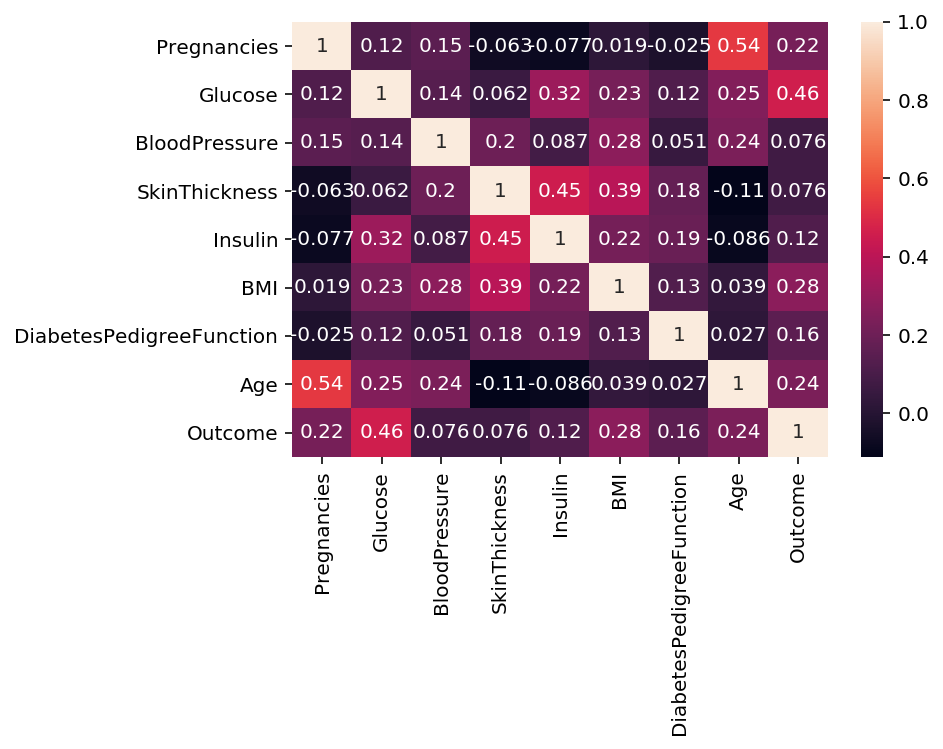

In [13]:
column_x = data_func.columns[0:len(data_func.columns) - 1]
corr = data_func[data_func.columns].corr()
sns.heatmap(corr, annot = True)

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [15]:
X = data_func.iloc[:,0:8]
Y = data_func.iloc[:,8]
select_top_4 = SelectKBest(score_func=chi2, k = 4)
fit = select_top_4.fit(X,Y)
features = fit.transform(X)

In [16]:
features[0:5]

array([[138. ,   0. ,  33.6,  47. ],
       [ 84. , 125. ,  38.2,  23. ],
       [145. ,   0. ,  44.2,  31. ],
       [135. , 250. ,  42.3,  24. ],
       [139. , 480. ,  40.7,  21. ]])

In [17]:
data_func.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [18]:
X_features = pd.DataFrame(data = features, columns = ["Glucose","Insulin","BMI","Age"])
Y = data_func.iloc[:,8]

# Standardization

In [19]:
from sklearn.preprocessing import StandardScaler
rescaledX = StandardScaler().fit_transform(X_features)

In [20]:
X = pd.DataFrame(data = rescaledX, columns= X_features.columns)

# cross validation

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state = 24, test_size = 0.3)
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [22]:
models = []
models.append(("SVM",SVC()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("LR",LogisticRegression()))

In [23]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print('accurcy of ',names[i],':' ,results[i].mean())

accurcy of  SVM : 0.7985714285714285
accurcy of  NB : 0.7642857142857142
accurcy of  KNN : 0.7828571428571429
accurcy of  DT : 0.945
accurcy of  LR : 0.7785714285714285


# Logistic Regression and SVM provides maximum results.

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state = 20, test_size = 0.33)
lr = LogisticRegression()
lr.fit(X_train,Y_train)
predictions = lr.predict(X_test)

# accuracy of Logistic Regression

In [25]:
accuracy_score(Y_test,predictions)

0.7439393939393939

# apply svm algorithm

In [26]:
svm = SVC()
svm.fit(X_train,Y_train)
predictions = svm.predict(X_test)

# accuracy of svm

In [27]:
accuracy_score(Y_test,predictions)

0.7666666666666667

# classification report

In [28]:
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.88      0.83       443
          1       0.68      0.54      0.60       217

avg / total       0.76      0.77      0.76       660

